In [0]:
import codecs
import json
import requests
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
from io import BytesIO

In [0]:
import keras
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Reshape, UpSampling2D, Concatenate
from keras import backend as K

Using TensorFlow backend.


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/ML and DL Repository/Projects/Advance Computer Vision/Updated ACV Project/Face Detection New')

In [0]:
project_path = "/content/drive/My Drive/DLCP/"

In [0]:
JSONPATH = project_path + "face_detection.json"

In [0]:
JSONPATH = "face_detection.json"

In [0]:
# get links and stuff from json
jsonData = []
with codecs.open(JSONPATH, 'rU', 'utf-8') as js:
    for line in js:
        jsonData.append(json.loads(line))

print(f"{len(jsonData)} image found!")

print("Sample row:")
jsonData[0]

409 image found!
Sample row:


{'annotation': [{'imageHeight': 333,
   'imageWidth': 650,
   'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
    {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
  {'imageHeight': 333,
   'imageWidth': 650,
   'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
    {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg',
 'extras': None}

In [0]:
images = []
for data in tqdm(jsonData):
    response = requests.get(data['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    images.append([img, data["annotation"]])

100%|██████████| 409/409 [03:15<00:00,  2.10it/s]


In [0]:
np.save('images.npy', images)

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
ALPHA = 1.0

In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

In [0]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

In [0]:
import cv2

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    # print(img.shape)
    # img.reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        # print(i)
        original_height = i["imageHeight"]
        original_width = i["imageWidth"]
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [0]:
X_train = np.array(X_train)
X_train.shape

(409, 224, 224, 3)

In [0]:
masks.shape

(409, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

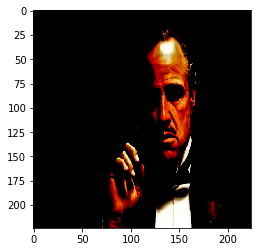

In [0]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

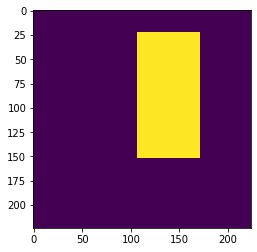

In [0]:
pyplot.imshow(masks[n])

In [0]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable
    # model.summary()
  
    block_1 = model.get_layer("conv_pw_1_relu").output
    block0 = model.get_layer("conv_pw_3_relu").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block_1])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)
    return Model(inputs=model.input, outputs=x)

In [0]:
model = create_model() # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
# model.summary() # Print summary

(?, 14, 14, 1536)
(?, 28, 28, 1792)
(?, 56, 56, 1920)
(?, 112, 112, 1984)
(?, 224, 224, 1984)
(?, 224, 224)


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

In [0]:
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

EPOCHS = 10

# WEIGHTS_FILE = 'model-1.66.h5'
# model = create_model(False)
# model.load_weights(WEIGHTS_FILE)

optimizer = Adam(lr=1e-3)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [0]:
model.fit(X_train, masks, epochs=EPOCHS, verbose=1, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Train on 409 samples
Epoch 1/10
408/409 [============================>.] - ETA: 0s - loss: 1.1982 - dice_coefficient: 0.5105
Epoch 00001: loss improved from inf to 1.19818, saving model to model-1.20.h5
409/409 [==============================] - 55s 135ms/sample - loss: 1.1982 - dice_coefficient: 0.5102
Epoch 2/10
408/409 [============================>.] - ETA: 0s - loss: 0.8616 - dice_coefficient: 0.5965
Epoch 00002: loss improved from 1.19818 to 0.86464, saving model to model-0.86.h5
409/409 [==============================] - 45s 109ms/sample - loss: 0.8646 - dice_coefficient: 0.5964
Epoch 3/10
408/409 [============================>.] - ETA: 0s - loss: 0.7489 - dice_coefficient: 0.6374
Epoch 00003: loss improved from 0.86464 to 0.74824, saving model to model-0.75.h5
409/409 [==============================] - 44s 109ms/sample - loss: 0.7482 - dice_coefficient: 0.6376
Epoch 4/10
408/409 [============================>.] - ETA: 0s - loss: 0.6952 - dice_coefficient: 0.6622
Epoch 00004: lo

In [0]:
n = 140
image = X_train[n]
ft = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


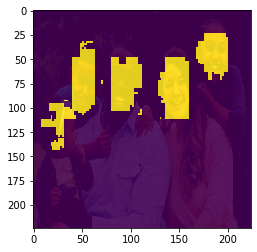

In [0]:
import matplotlib.pyplot as plt
out_image = image
plt.imshow(out_image)
plt.imshow(pred_mask, alpha=0.9)